In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('train-chennai-sale.csv')

In [4]:
df_train.shape

(7109, 22)

In [5]:
df_train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
############################### DATA CLEANING ############################################################

In [7]:
############################## FILL NULL VALUES ##########################################################

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [9]:
sum(df_train.isna().any())

3

<AxesSubplot:>

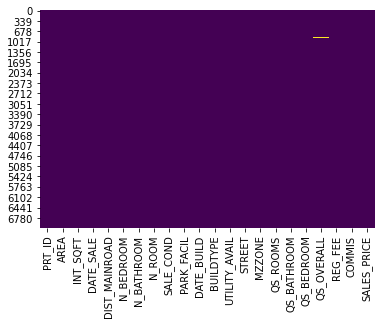

In [10]:
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis')

In [11]:
#N_BEDROOM are non-continuous values, so fill with mode
df_train['N_BEDROOM'].fillna(value=df_train['N_BEDROOM'].mode()[0],inplace = True)

In [12]:
df_train['N_BATHROOM'].fillna(value=df_train['N_BATHROOM'].mode()[0],inplace = True)

In [13]:
#QS_OVERALL are continuous values, so fill with mean
df_train['QS_OVERALL'].fillna(value=df_train['QS_OVERALL'].mean(),inplace = True)

In [14]:
sum(df_train.isna().any())

0

In [15]:
#type cast float to int, as these are number of rooms. 
df_train['N_BEDROOM'] = df_train['N_BEDROOM'].apply(int)
df_train['N_BATHROOM'] = df_train['N_BATHROOM'].apply(int)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [17]:
############################### VERIFYING OUTLIERS AND FILLING THEM  ##########################################
############################### LET US THINK THAT ALL THE VALUES ARE CORRECT, AS THESE ARE REAL TIME VALUES, CAN ALL BE CORRECT
############################### NO NEED OF OUTLIERS FILLING WITH MEAN/MODE

In [18]:
list_num_col = df_train.select_dtypes(exclude='object')
list_num_col

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3,2,5,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2,1,4,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1,1,2,4.6,3.8,4.1,4.160,425350,119098,8507000


In [19]:
############################# SPELL CHECK ###################################################################################

In [20]:
list_obj_col = df_train.select_dtypes(include='object')

In [21]:
list_obj_col

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Others,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


In [22]:
list_obj_col['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [23]:
for i in range(df_train.shape[0]):
    if(df_train['AREA'][i] == 'Chrompt'):        
        df_train['AREA'][i] = 'Chrompet'        
    if(df_train['AREA'][i] == 'Chormpet'):        
        df_train['AREA'][i] = 'Chrompet'
    if(df_train['AREA'][i] == 'Chrmpet'):        
        df_train['AREA'][i] = 'Chrompet'
    if(df_train['AREA'][i] == 'TNagar'):        
        df_train['AREA'][i] = 'T Nagar'
    if(df_train['AREA'][i] == 'Karapakam'):        
        df_train['AREA'][i] = 'Karapakkam'
    if(df_train['AREA'][i] == 'Ana Nagar'):        
        df_train['AREA'][i] = 'Anna Nagar'
    if(df_train['AREA'][i] == 'Ann Nagar'):        
        df_train['AREA'][i] = 'Anna Nagar'
    if(df_train['AREA'][i] == 'Velchery'):        
        df_train['AREA'][i] = 'Velachery'
    if(df_train['AREA'][i] == 'KKNagar'):        
        df_train['AREA'][i] = 'KK Nagar'
    if(df_train['AREA'][i] == 'Adyr'):        
        df_train['AREA'][i] = 'Adyar'

<ipython-input-23-771e9d0dc067>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AREA'][i] = 'T Nagar'
<ipython-input-23-771e9d0dc067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AREA'][i] = 'Chrompet'
<ipython-input-23-771e9d0dc067>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AREA'][i] = 'Chrompet'
<ipython-input-23-771e9d0dc067>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [24]:
df_train['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [25]:
df_train['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [26]:
for i in range(df_train.shape[0]):
    if(df_train['SALE_COND'][i] == 'Adj Land'):        
        df_train['SALE_COND'][i] = 'AdjLand'        
    if(df_train['SALE_COND'][i] == 'Ab Normal'):        
        df_train['SALE_COND'][i] = 'AbNormal'
    if(df_train['SALE_COND'][i] == 'Partiall'):        
        df_train['SALE_COND'][i] = 'Partial'
    if(df_train['SALE_COND'][i] == 'PartiaLl'):        
        df_train['SALE_COND'][i] = 'Partial'    

<ipython-input-26-706fbdac2dee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SALE_COND'][i] = 'AbNormal'
<ipython-input-26-706fbdac2dee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SALE_COND'][i] = 'Partial'
<ipython-input-26-706fbdac2dee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SALE_COND'][i] = 'AdjLand'
<ipython-input-26-706fbdac2dee>:9: SettingWithCopyWarning: 
A value is trying to be 

In [27]:
df_train['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [28]:
df_train['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [29]:
for i in range(df_train.shape[0]):
    if(df_train['PARK_FACIL'][i] == 'Noo'):        
        df_train['PARK_FACIL'][i] = 'No' 

<ipython-input-29-e7d856b38234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PARK_FACIL'][i] = 'No'


In [30]:
df_train['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [31]:
df_train['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [32]:
for i in range(df_train.shape[0]):
    if(df_train['BUILDTYPE'][i] == 'Other'):        
        df_train['BUILDTYPE'][i] = 'Others'        
    if(df_train['BUILDTYPE'][i] == 'Comercial'):        
        df_train['BUILDTYPE'][i] = 'Commercial'

<ipython-input-32-877260b7d58e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BUILDTYPE'][i] = 'Others'
<ipython-input-32-877260b7d58e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BUILDTYPE'][i] = 'Commercial'


In [33]:
df_train['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [34]:
df_train['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [35]:
for i in range(df_train.shape[0]):
    if(df_train['UTILITY_AVAIL'][i] == 'All Pub'):        
        df_train['UTILITY_AVAIL'][i] = 'AllPub'

<ipython-input-35-959d27b731e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['UTILITY_AVAIL'][i] = 'AllPub'


In [36]:
df_train['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [37]:
df_train['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [38]:
for i in range(df_train.shape[0]):
    if(df_train['STREET'][i] == 'Pavd'):        
        df_train['STREET'][i] = 'Paved'        
    if(df_train['STREET'][i] == 'NoAccess'):        
        df_train['STREET'][i] = 'No Access'

<ipython-input-38-c7e8feb38344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['STREET'][i] = 'Paved'
<ipython-input-38-c7e8feb38344>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['STREET'][i] = 'No Access'


In [39]:
df_train['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [40]:
df_train['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [41]:
df_train

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [42]:
######################### ID to verify if there are any duplicates ############################################

In [43]:
len(df_train.PRT_ID.unique()) #=7109 SO NO DUPLICATES. ALL ARE UNIQUE

7109

In [44]:
############# To convert every date into DD/MM/YYYY format, by chance if at all any unseen date is in a different format ############################################

In [45]:
df_train['DATE_BUILD'] = pd.to_datetime(df_train['DATE_BUILD'])
df_train['DATE_SALE'] = pd.to_datetime(df_train['DATE_SALE'])


In [46]:
df_train['DATE_BUILD'] = df_train['DATE_BUILD'].dt.strftime('%d-%m-%Y')
df_train['DATE_SALE'] = df_train['DATE_SALE'].dt.strftime('%d-%m-%Y')

In [47]:
################ BEFORE FEATURE ENCODING EXLORATORY DATA ANALYSIS : FEATURE VS TARGET BAR GRAPHS are most important
################ IF LINEAR RELATION RANK AND SUSTITUTE THE RANK VALUE. IF NON LINEAR/EXPONENTIAL ONE-HOT ENCODING.

In [48]:
#UNI VARIATE ANALYSIS

C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


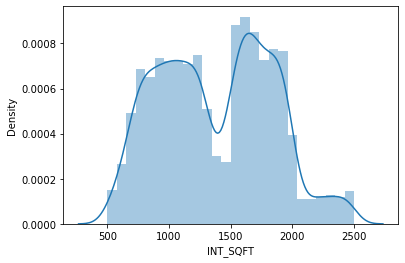

In [49]:
sns_plot = sns.distplot(df_train["INT_SQFT"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


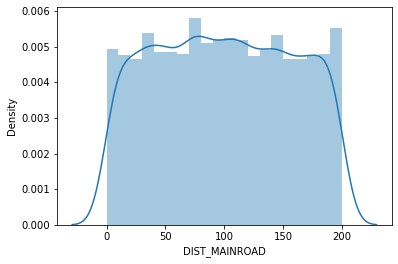

In [50]:
sns_plot = sns.distplot(df_train["DIST_MAINROAD"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


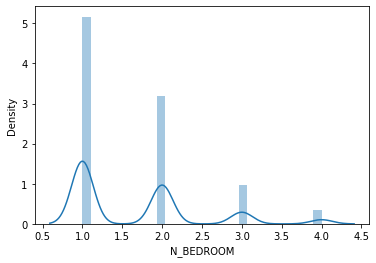

In [51]:
sns_plot = sns.distplot(df_train["N_BEDROOM"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


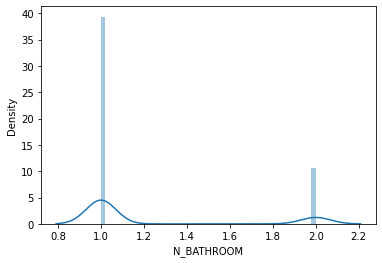

In [52]:
sns_plot = sns.distplot(df_train["N_BATHROOM"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


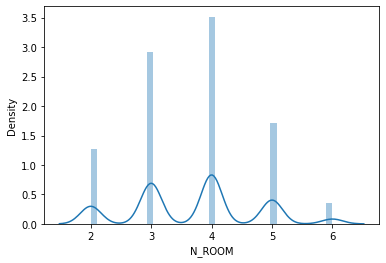

In [53]:
sns_plot = sns.distplot(df_train["N_ROOM"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


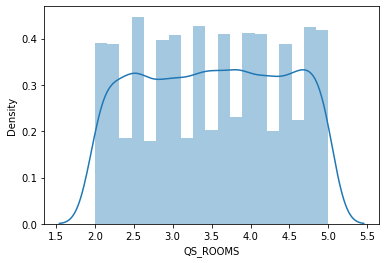

In [54]:
sns_plot = sns.distplot(df_train["QS_ROOMS"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


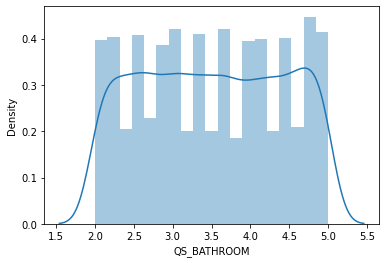

In [55]:
sns_plot = sns.distplot(df_train["QS_BATHROOM"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


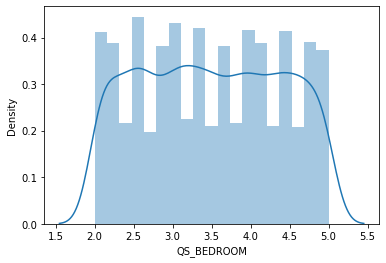

In [56]:
sns_plot = sns.distplot(df_train["QS_BEDROOM"])


C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


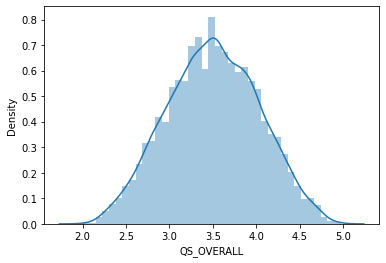

In [57]:
sns_plot = sns.distplot(df_train["QS_OVERALL"])

C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


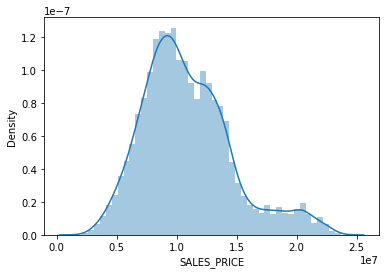

In [58]:
sns_plot = sns.distplot(df_train["SALES_PRICE"])

In [59]:
#Exploring the range and distribution of numerical Variables

C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANACONDA-2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

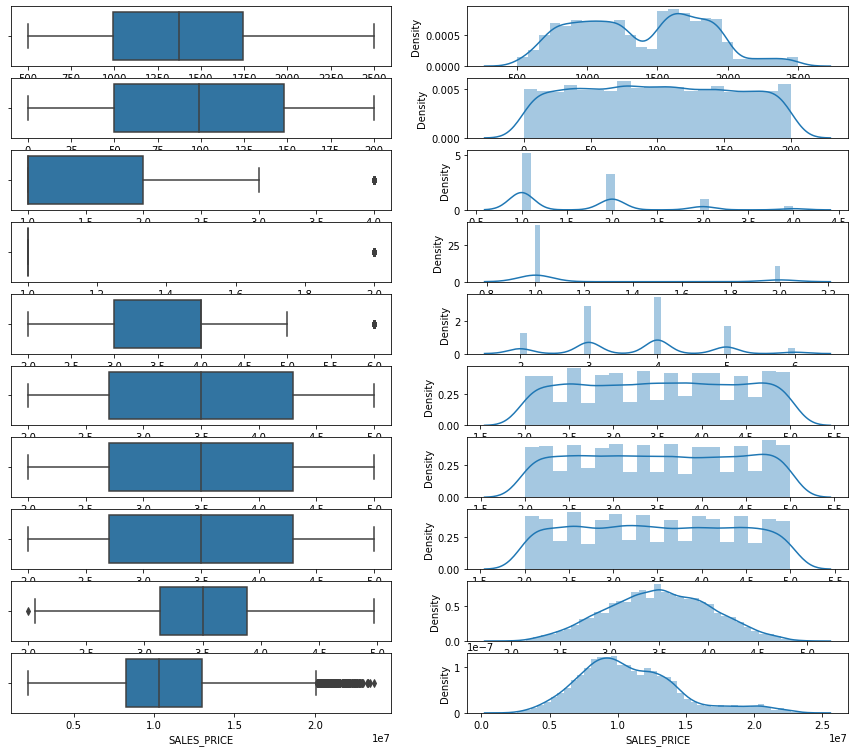

In [60]:
fig, ax = plt.subplots(10, 2, figsize = (15, 13))
sns.boxplot(x= df_train["INT_SQFT"], ax = ax[0,0])
sns.distplot(df_train['INT_SQFT'], ax = ax[0,1])
sns.boxplot(x= df_train["DIST_MAINROAD"], ax = ax[1,0])
sns.distplot(df_train['DIST_MAINROAD'], ax = ax[1,1])

sns.boxplot(x= df_train["N_BEDROOM"], ax = ax[2,0])
sns.distplot(df_train['N_BEDROOM'], ax = ax[2,1])
sns.boxplot(x= df_train["N_BATHROOM"], ax = ax[3,0])
sns.distplot(df_train['N_BATHROOM'], ax = ax[3,1])

sns.boxplot(x= df_train["N_ROOM"], ax = ax[4,0])
sns.distplot(df_train['N_ROOM'], ax = ax[4,1])
sns.boxplot(x= df_train["QS_ROOMS"], ax = ax[5,0])
sns.distplot(df_train['QS_ROOMS'], ax = ax[5,1])

sns.boxplot(x= df_train["QS_BATHROOM"], ax = ax[6,0])
sns.distplot(df_train['QS_BATHROOM'], ax = ax[6,1])
sns.boxplot(x= df_train["QS_BEDROOM"], ax = ax[7,0])
sns.distplot(df_train['QS_BEDROOM'], ax = ax[7,1])

sns.boxplot(x= df_train["QS_OVERALL"], ax = ax[8,0])
sns.distplot(df_train['QS_OVERALL'], ax = ax[8,1])
sns.boxplot(x= df_train["SALES_PRICE"], ax = ax[9,0])
sns.distplot(df_train['SALES_PRICE'], ax = ax[9,1])



In [61]:
#Plot Numerical Variables


In [62]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'SALES_PRICE')

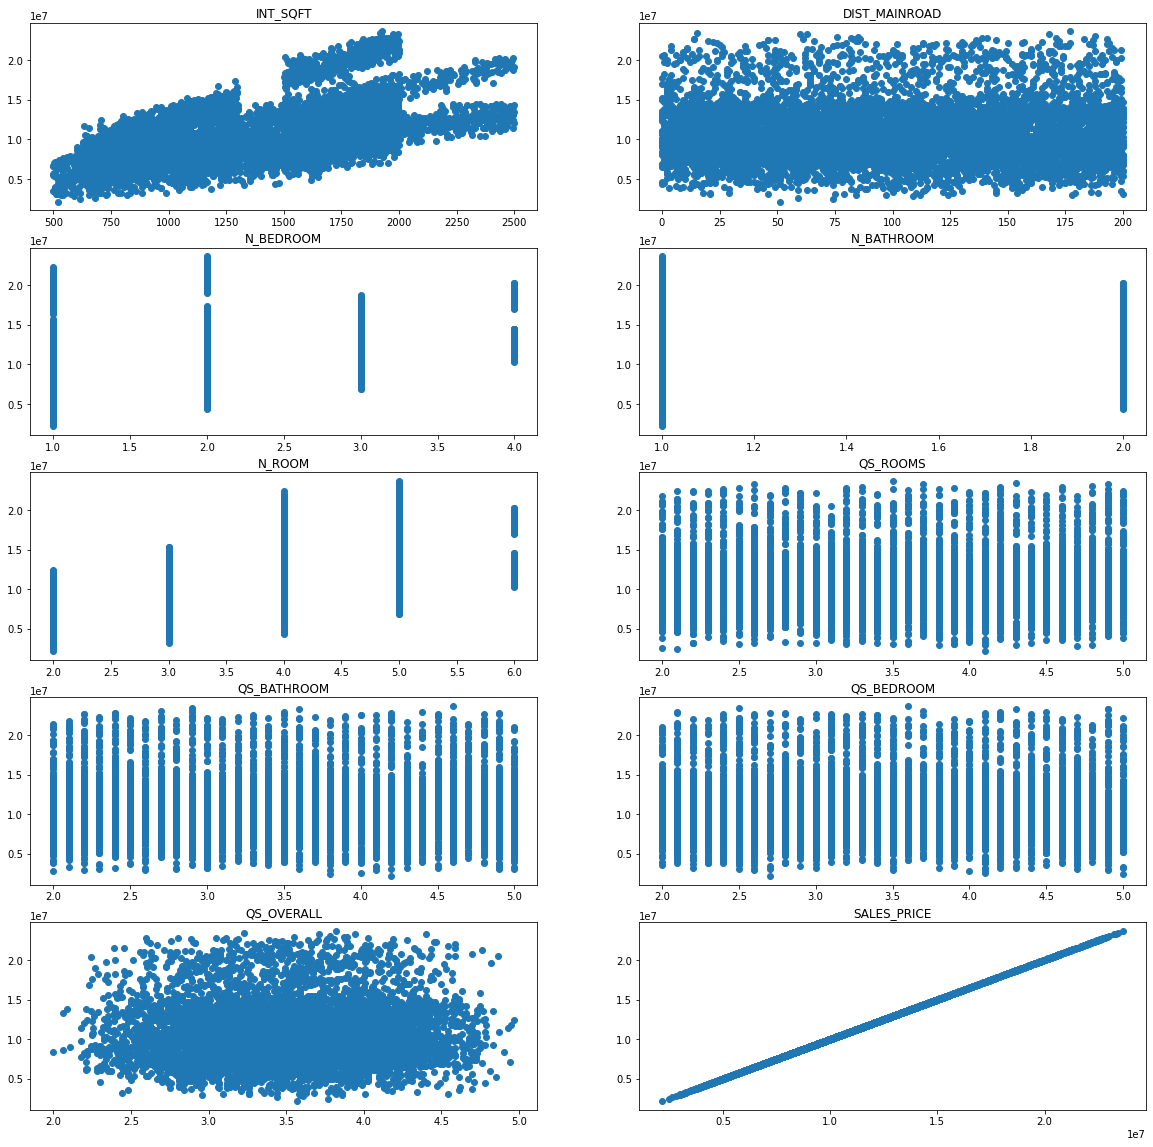

In [63]:
f,axarr = plt.subplots(5,2, figsize=(20,20))
mpgval = df_train.SALES_PRICE.values
axarr[0,0].scatter(df_train.INT_SQFT.values, mpgval)
axarr[0,0].set_title('INT_SQFT')
axarr[0,1].scatter(df_train.DIST_MAINROAD.values, mpgval)
axarr[0,1].set_title('DIST_MAINROAD')

axarr[1,0].scatter(df_train.N_BEDROOM.values, mpgval)
axarr[1,0].set_title('N_BEDROOM')
axarr[1,1].scatter(df_train.N_BATHROOM.values, mpgval)
axarr[1,1].set_title('N_BATHROOM')

axarr[2,0].scatter(df_train.N_ROOM.values, mpgval)
axarr[2,0].set_title('N_ROOM')
axarr[2,1].scatter(df_train.QS_ROOMS.values, mpgval)
axarr[2,1].set_title('QS_ROOMS')

axarr[3,0].scatter(df_train.QS_BATHROOM.values, mpgval)
axarr[3,0].set_title('QS_BATHROOM')
axarr[3,1].scatter(df_train.QS_BEDROOM.values, mpgval)
axarr[3,1].set_title('QS_BEDROOM')

axarr[4,0].scatter(df_train.QS_OVERALL.values, mpgval)
axarr[4,0].set_title('QS_OVERALL')
axarr[4,1].scatter(df_train.SALES_PRICE.values, mpgval)
axarr[4,1].set_title('SALES_PRICE')

In [64]:
#Distributions of the variables/features.

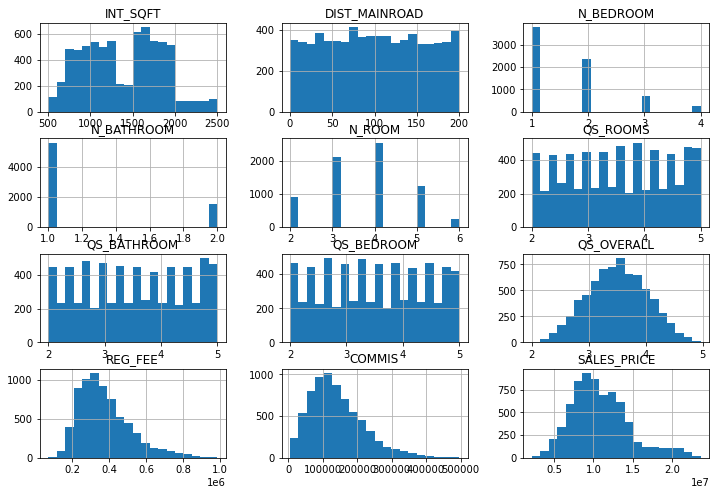

In [65]:
df_train.hist(figsize=(12,8),bins=20)
plt.show()

In [66]:
###################################  how does everything effect sale price scatter plots #########################

Text(0, 0.5, 'SALES_PRICE')

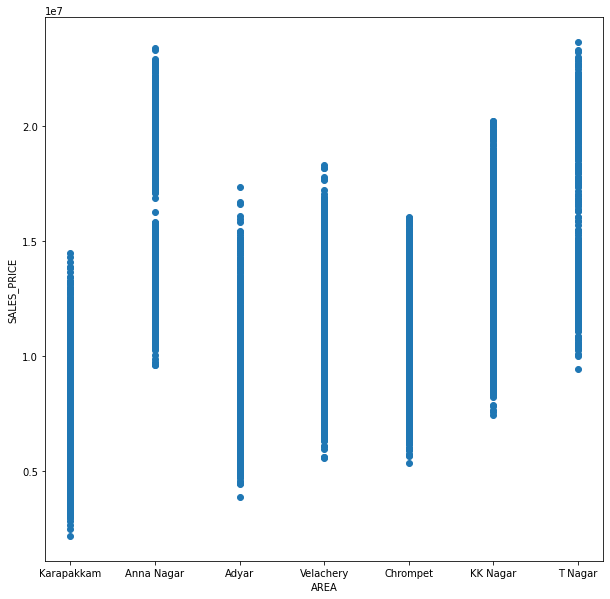

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(x='AREA',y='SALES_PRICE',data=df_train)
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

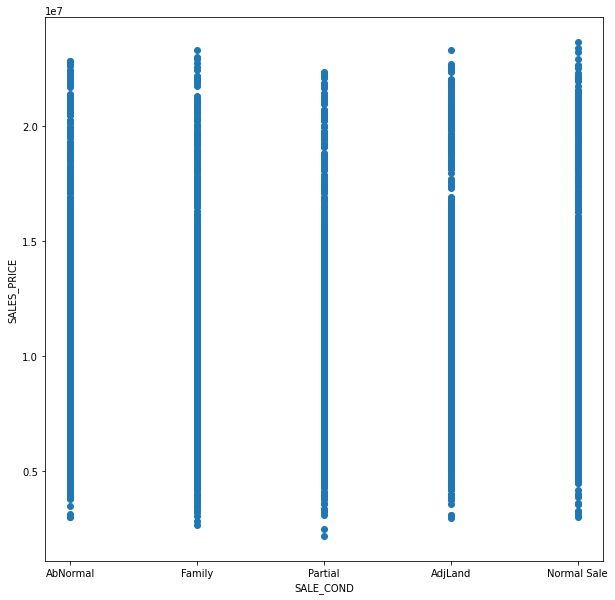

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(x='SALE_COND',y='SALES_PRICE',data=df_train)
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

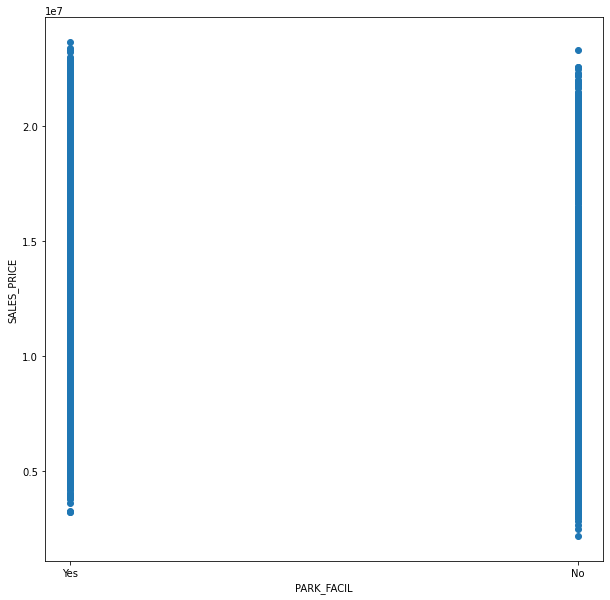

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(x='PARK_FACIL',y='SALES_PRICE',data=df_train)
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

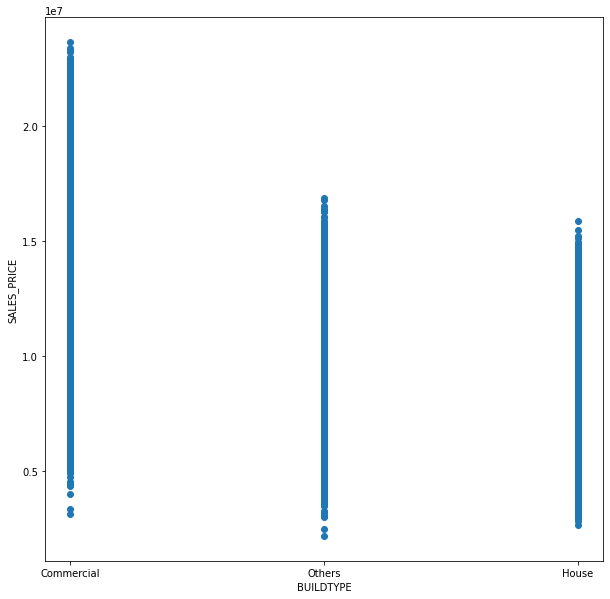

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(x='BUILDTYPE',y='SALES_PRICE',data=df_train)
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

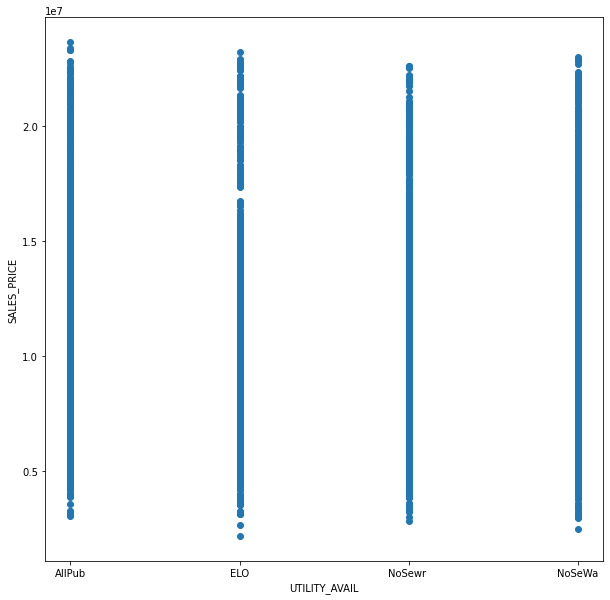

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(x='UTILITY_AVAIL',y='SALES_PRICE',data=df_train)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

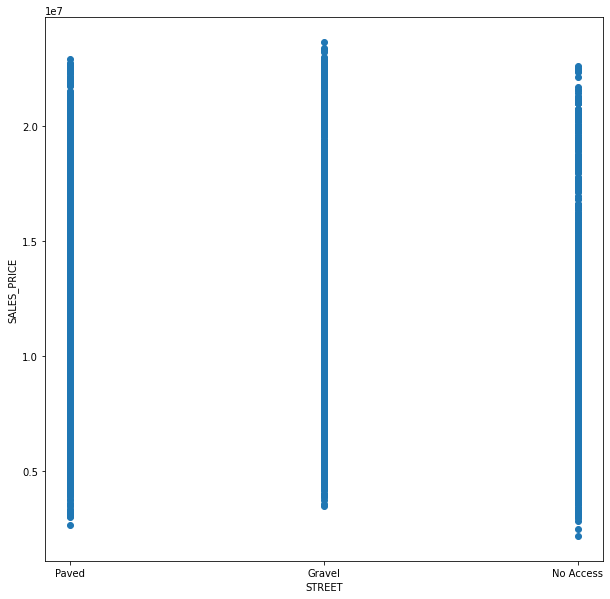

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(x='STREET',y='SALES_PRICE',data=df_train)
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

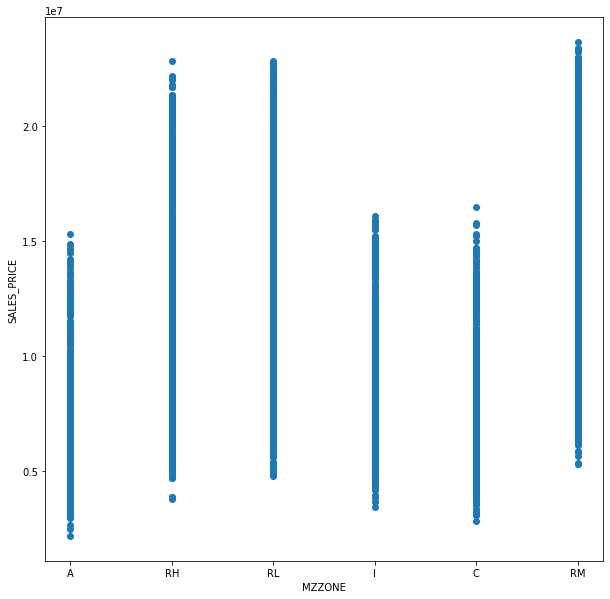

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(x='MZZONE',y='SALES_PRICE',data=df_train)
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

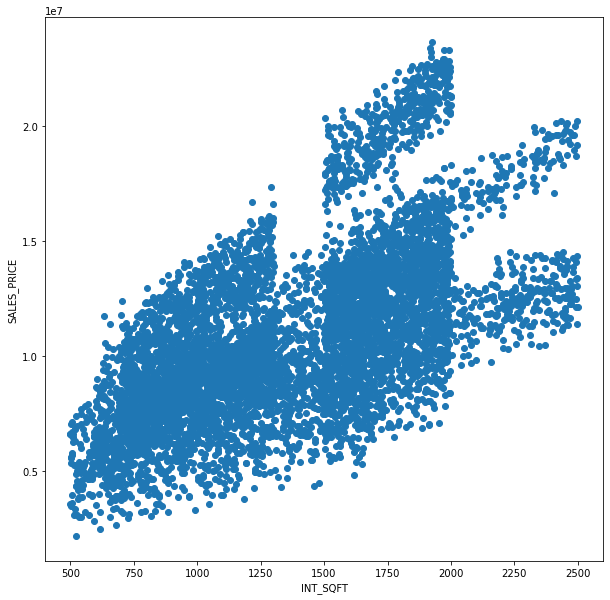

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(x='INT_SQFT',y='SALES_PRICE',data=df_train)
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

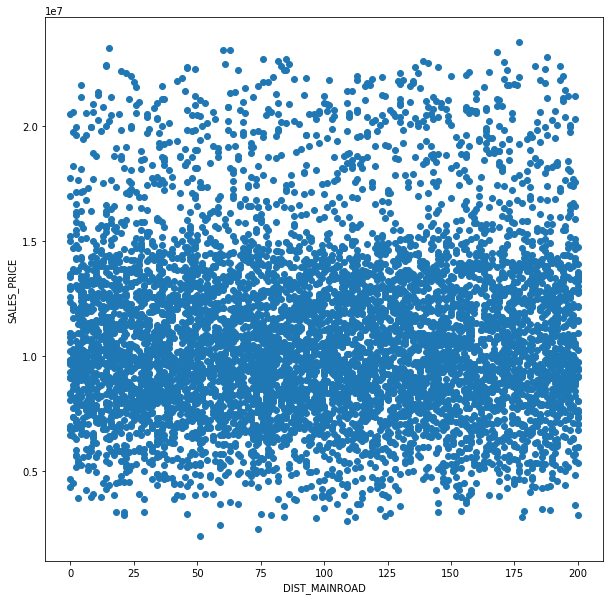

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(x='DIST_MAINROAD',y='SALES_PRICE',data=df_train)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

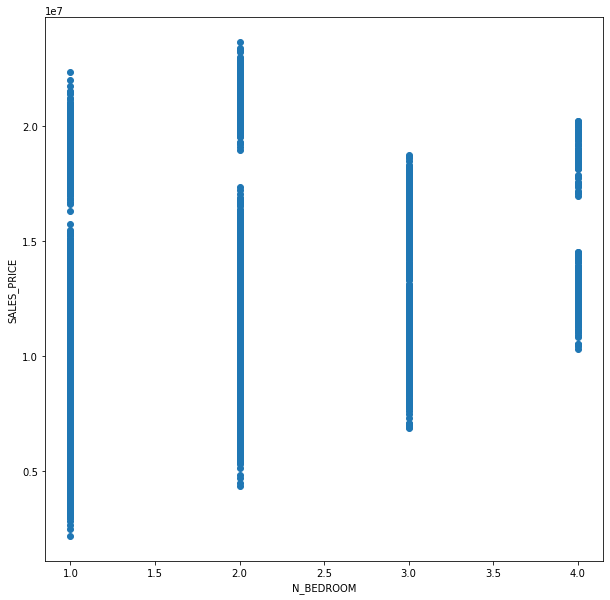

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(x='N_BEDROOM',y='SALES_PRICE',data=df_train)
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

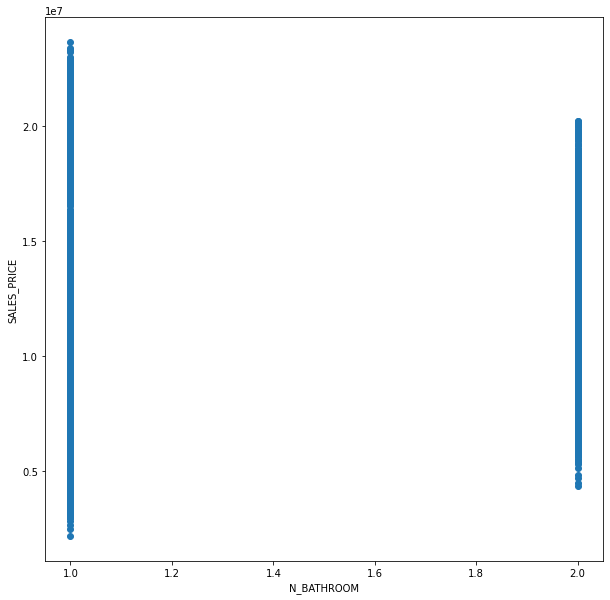

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(x='N_BATHROOM',y='SALES_PRICE',data=df_train)
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

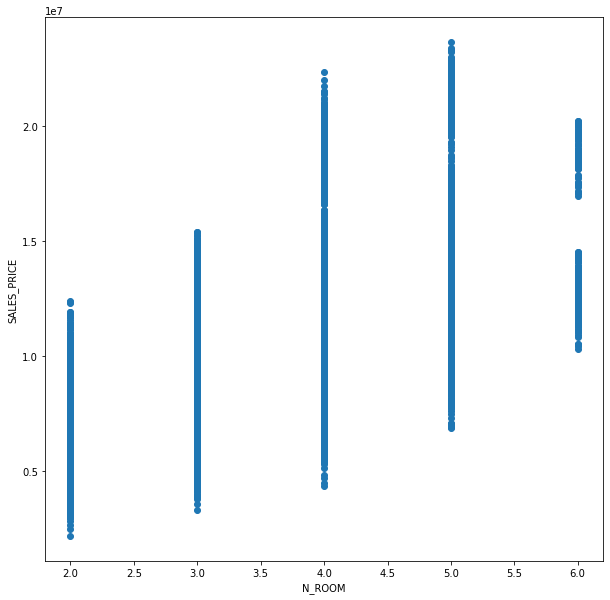

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(x='N_ROOM',y='SALES_PRICE',data=df_train)
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

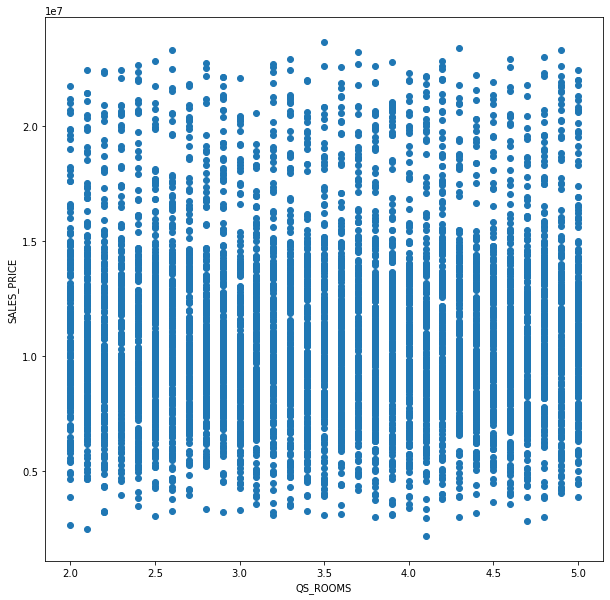

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(x='QS_ROOMS',y='SALES_PRICE',data=df_train)
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

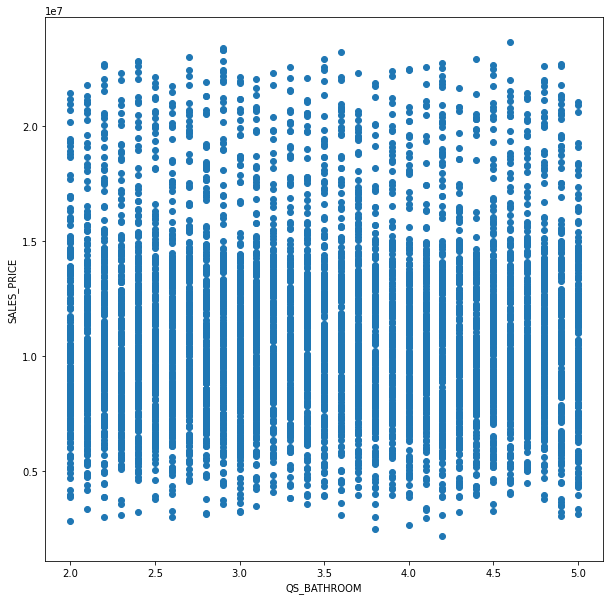

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(x='QS_BATHROOM',y='SALES_PRICE',data=df_train)
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

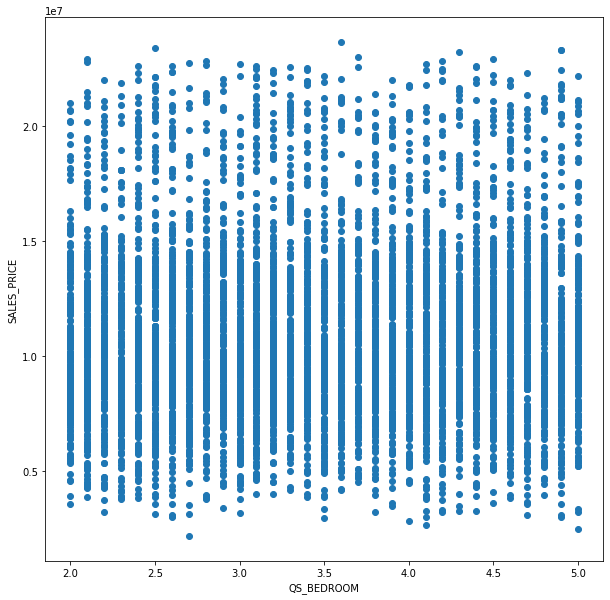

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(x='QS_BEDROOM',y='SALES_PRICE',data=df_train)
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

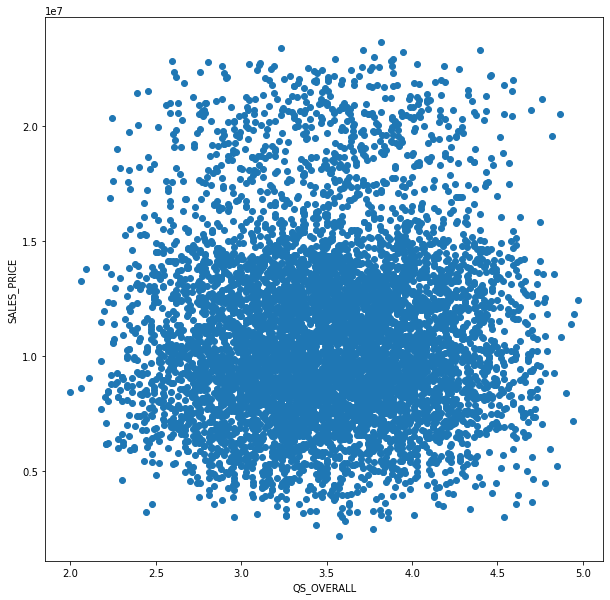

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(x='QS_OVERALL',y='SALES_PRICE',data=df_train)
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')

Text(0, 0.5, 'SALES_PRICE')

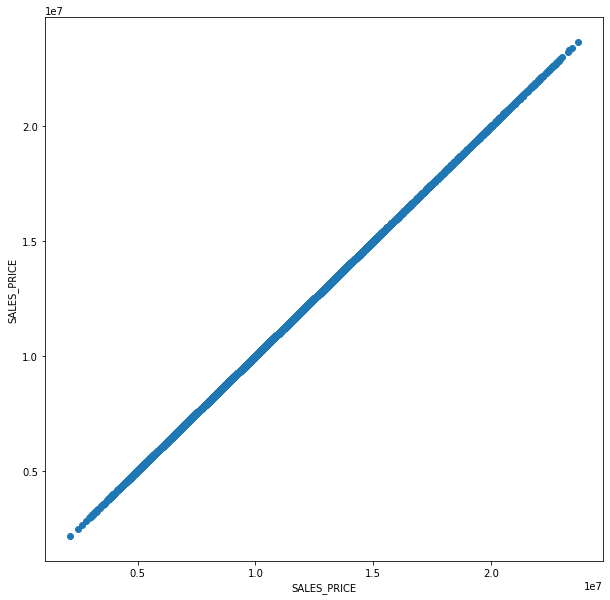

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(x='SALES_PRICE',y='SALES_PRICE',data=df_train)
plt.xlabel('SALES_PRICE')
plt.ylabel('SALES_PRICE')

In [84]:
list_obj_col

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Others,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


Text(0.5, 1.0, 'AREA vs SALES_PRICE')

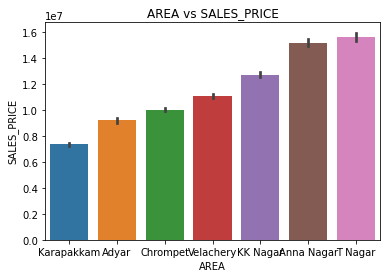

In [85]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x=df_train.AREA,y=df_train.SALES_PRICE,order=df_train.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

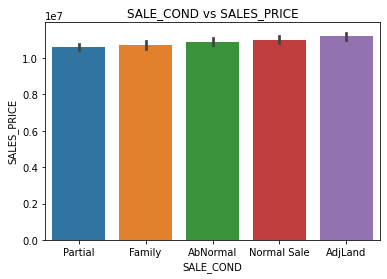

In [86]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
sns.barplot(x=df_train.SALE_COND,y=df_train.SALES_PRICE,order=df_train.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

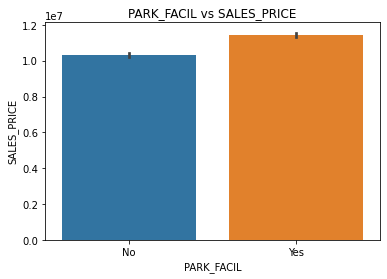

In [87]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
sns.barplot(x=df_train.PARK_FACIL,y=df_train.SALES_PRICE,order=df_train.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

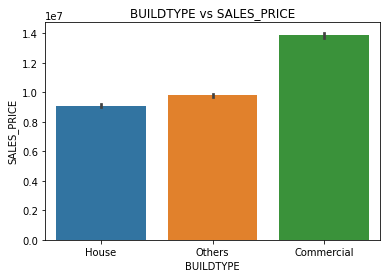

In [88]:
#as from the bar plot it is evident that a non linear relationship/an exponential relationship. so one-hot encoding 
sns.barplot(x=df_train.BUILDTYPE,y=df_train.SALES_PRICE,order=df_train.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

Text(0.5, 1.0, 'UTILITY_AVAIL vs SALES_PRICE')

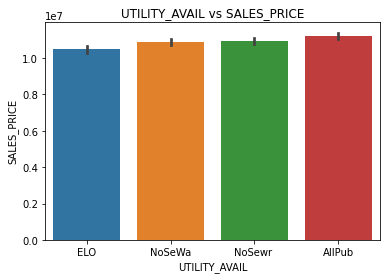

In [89]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
sns.barplot(x=df_train.UTILITY_AVAIL,y=df_train.SALES_PRICE,order=df_train.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

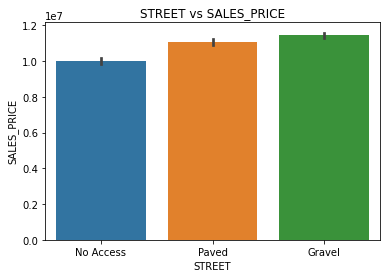

In [90]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
sns.barplot(x=df_train.STREET,y=df_train.SALES_PRICE,order=df_train.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

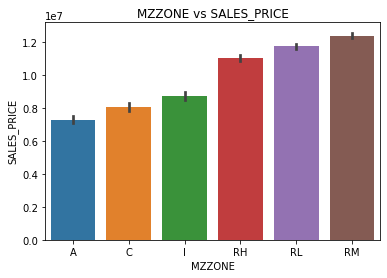

In [91]:
#as from the bar plot it is evident that a linear relationship. so lable encoding as per rank
sns.barplot(x=df_train.MZZONE,y=df_train.SALES_PRICE,order=df_train.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

In [92]:
#converting the dates difference into number of days
df_train['DATE_SALE'] = pd.to_datetime(df_train['DATE_SALE'].astype(str), format='%d-%m-%Y')
df_train['DATE_BUILD'] = pd.to_datetime(df_train['DATE_BUILD'].astype(str), format='%d-%m-%Y')


In [93]:
df_train['BUILDING_AGE_IN_DAYS'] = df_train['DATE_SALE'].subtract( df_train['DATE_BUILD'])

In [94]:
df_train['BUILDING_AGE_IN_DAYS'] = df_train['BUILDING_AGE_IN_DAYS'].divide( np.timedelta64(1, 'D'))

In [95]:
df_train['BUILDING_AGE_IN_DAYS']

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: BUILDING_AGE_IN_DAYS, Length: 7109, dtype: float64

In [96]:
#Type cast all the values in BUILDING_AGE_IN_DAYS to int64 from float64
df_train['BUILDING_AGE_IN_DAYS'] = df_train['BUILDING_AGE_IN_DAYS'].apply(int)

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PRT_ID                7109 non-null   object        
 1   AREA                  7109 non-null   object        
 2   INT_SQFT              7109 non-null   int64         
 3   DATE_SALE             7109 non-null   datetime64[ns]
 4   DIST_MAINROAD         7109 non-null   int64         
 5   N_BEDROOM             7109 non-null   int64         
 6   N_BATHROOM            7109 non-null   int64         
 7   N_ROOM                7109 non-null   int64         
 8   SALE_COND             7109 non-null   object        
 9   PARK_FACIL            7109 non-null   object        
 10  DATE_BUILD            7109 non-null   datetime64[ns]
 11  BUILDTYPE             7109 non-null   object        
 12  UTILITY_AVAIL         7109 non-null   object        
 13  STREET            

In [98]:
#lable encoding of "PARK_FACIL"
K_PARK_FACIL = []
for i in range(df_train.shape[0]):
    if(df_train['PARK_FACIL'][i] == "Yes"):        
        K_PARK_FACIL.append(1)
    if(df_train['PARK_FACIL'][i] == "No"):        
        K_PARK_FACIL.append(0)
df_train['PARK_FACIL'] = K_PARK_FACIL

In [99]:
#lable encoding of "AREA"
RANK = []
for i in range(df_train.shape[0]):
    if(df_train['AREA'][i] == 'Karapakkam'):
        RANK.append(0)
    if(df_train['AREA'][i] == 'Adyar'):
        RANK.append(1)
    if(df_train['AREA'][i] == 'Chrompet'):
        RANK.append(2)
    if(df_train['AREA'][i] == 'Velachery'):
        RANK.append(3)
    if(df_train['AREA'][i] == 'KK Nagar'):
        RANK.append(4)
    if(df_train['AREA'][i] == 'Anna Nagar'):
        RANK.append(5)
    if(df_train['AREA'][i] == 'T Nagar'):
        RANK.append(6)
df_train['AREA'] = RANK

In [100]:
#lable encoding of "SALE_COND"

SC = []
for i in range(df_train.shape[0]):
    if(df_train['SALE_COND'][i] == 'Partial'):
        SC.append(0)
    if(df_train['SALE_COND'][i] == 'Family'):
        SC.append(1)
    if(df_train['SALE_COND'][i] == 'AbNormal'):
        SC.append(2)
    if(df_train['SALE_COND'][i] == 'Normal Sale'):
        SC.append(3)
    if(df_train['SALE_COND'][i] == 'AdjLand'):
        SC.append(4)
df_train['SALE_COND'] = SC    


In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PRT_ID                7109 non-null   object        
 1   AREA                  7109 non-null   int64         
 2   INT_SQFT              7109 non-null   int64         
 3   DATE_SALE             7109 non-null   datetime64[ns]
 4   DIST_MAINROAD         7109 non-null   int64         
 5   N_BEDROOM             7109 non-null   int64         
 6   N_BATHROOM            7109 non-null   int64         
 7   N_ROOM                7109 non-null   int64         
 8   SALE_COND             7109 non-null   int64         
 9   PARK_FACIL            7109 non-null   int64         
 10  DATE_BUILD            7109 non-null   datetime64[ns]
 11  BUILDTYPE             7109 non-null   object        
 12  UTILITY_AVAIL         7109 non-null   object        
 13  STREET            

In [102]:
df_train['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [103]:
#lable encoding of "STREET"
ST = []
for i in range(df_train.shape[0]):
    if(df_train['STREET'][i] == 'No Access'):
        ST.append(0)
    if(df_train['STREET'][i] == 'Paved'):
        ST.append(1)
    if(df_train['STREET'][i] == 'Gravel'):
        ST.append(2)
df_train['STREET'] = ST

In [104]:
#lable encoding of "MZZONE"
MZ = []
for i in range(df_train.shape[0]):
    if(df_train['MZZONE'][i] == 'A'):
        MZ.append(0)
    if(df_train['MZZONE'][i] == 'C'):
        MZ.append(1)
    if(df_train['MZZONE'][i] == 'I'):
        MZ.append(2)
    if(df_train['MZZONE'][i] == 'RH'):
        MZ.append(3)
    if(df_train['MZZONE'][i] == 'RL'):
        MZ.append(4)
    if(df_train['MZZONE'][i] == 'RM'):
        MZ.append(5)

df_train['MZZONE'] = MZ

In [105]:
#lable encoding of "UTILITY_AVAIL". GETTING PROBLEM WITH "NoSewr" WORD, SO SIMPLE LABLE ENCODER BEING DONE
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["UTILITY_AVAIL"] = lb_make.fit_transform(df_train["UTILITY_AVAIL"])
df_train["UTILITY_AVAIL"] = df_train["UTILITY_AVAIL"].apply(int)


In [106]:
df_train.shape

(7109, 23)

In [107]:
df_train['BUILDTYPE']

0       Commercial
1       Commercial
2       Commercial
3           Others
4           Others
           ...    
7104        Others
7105        Others
7106         House
7107    Commercial
7108        Others
Name: BUILDTYPE, Length: 7109, dtype: object

In [108]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['BUILDTYPE']]).toarray())

In [109]:
encoder_df

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
7104,0.0,0.0,1.0
7105,0.0,0.0,1.0
7106,0.0,1.0,0.0
7107,1.0,0.0,0.0


In [110]:
encoder_df.columns = ['House','Others','Commercial']

In [111]:
encoder_df

,House,Others,Commercial
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
7104,0.0,0.0,1.0
7105,0.0,0.0,1.0
7106,0.0,1.0,0.0
7107,1.0,0.0,0.0


In [112]:
################################## UNTIL NOW ENTIRE DATAFRAME IS "df_train" ############################
################################## FROM HERE AFTER ONE HOT ENCODING "BUILDTYPE",DATA FRAME IS df_train_final3 ########################


In [113]:

df_train_final3 = pd.concat([df_train,encoder_df],axis=1)

In [114]:
df_train_final3

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,BUILDING_AGE_IN_DAYS,House,Others,Commercial
0,P03210,0,1004,2011-04-05,131,1,1,3,2,1,...,3.9,4.9,4.330,380000,144400,7600000,16031,1.0,0.0,0.0
1,P09411,5,1986,2006-12-19,26,2,1,5,2,0,...,4.2,2.5,3.765,760122,304049,21717770,4015,1.0,0.0,0.0
2,P01812,1,909,2012-04-02,70,1,1,3,2,1,...,3.8,2.2,3.090,421094,92114,13159200,7152,1.0,0.0,0.0
3,P05346,3,1855,2010-03-13,14,3,2,5,1,0,...,3.9,3.6,4.010,356321,77042,9630290,8030,0.0,0.0,1.0
4,P06210,0,1226,2009-05-10,84,1,1,3,2,1,...,2.5,4.1,3.290,237000,74063,7406250,10802,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,0,598,2011-03-01,51,1,1,2,4,0,...,2.2,2.4,2.520,208767,107060,5353000,17942,0.0,0.0,1.0
7105,P10000,3,1897,2004-08-04,52,3,2,5,1,1,...,4.5,3.3,3.920,346191,205551,10818480,3196,0.0,0.0,1.0
7106,P09594,3,1614,2006-08-25,152,2,1,4,3,0,...,4.2,2.9,3.840,317354,167028,8351410,10455,0.0,1.0,0.0
7107,P06508,0,787,2009-03-08,40,1,1,2,0,1,...,3.8,4.1,4.160,425350,119098,8507000,11443,1.0,0.0,0.0


In [115]:
df_train_final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PRT_ID                7109 non-null   object        
 1   AREA                  7109 non-null   int64         
 2   INT_SQFT              7109 non-null   int64         
 3   DATE_SALE             7109 non-null   datetime64[ns]
 4   DIST_MAINROAD         7109 non-null   int64         
 5   N_BEDROOM             7109 non-null   int64         
 6   N_BATHROOM            7109 non-null   int64         
 7   N_ROOM                7109 non-null   int64         
 8   SALE_COND             7109 non-null   int64         
 9   PARK_FACIL            7109 non-null   int64         
 10  DATE_BUILD            7109 non-null   datetime64[ns]
 11  BUILDTYPE             7109 non-null   object        
 12  UTILITY_AVAIL         7109 non-null   int64         
 13  STREET            

In [116]:
df_train_final4 = df_train_final3.loc[:, df_train_final3.columns.drop(['PRT_ID','DATE_SALE','BUILDTYPE','DATE_BUILD','REG_FEE','COMMIS'])]

In [117]:
df_train_final4

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE_IN_DAYS,House,Others,Commercial
0,0,1004,131,1,1,3,2,1,0,1,0,4.0,3.9,4.9,4.330,7600000,16031,1.0,0.0,0.0
1,5,1986,26,2,1,5,2,0,0,2,3,4.9,4.2,2.5,3.765,21717770,4015,1.0,0.0,0.0
2,1,909,70,1,1,3,2,1,1,2,4,4.1,3.8,2.2,3.090,13159200,7152,1.0,0.0,0.0
3,3,1855,14,3,2,5,1,0,3,1,2,4.7,3.9,3.6,4.010,9630290,8030,0.0,0.0,1.0
4,0,1226,84,1,1,3,2,1,0,2,1,3.0,2.5,4.1,3.290,7406250,10802,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,1,0,5,3.0,2.2,2.4,2.520,5353000,17942,0.0,0.0,1.0
7105,3,1897,52,3,2,5,1,1,2,0,3,3.6,4.5,3.3,3.920,10818480,3196,0.0,0.0,1.0
7106,3,1614,152,2,1,4,3,0,2,2,2,4.3,4.2,2.9,3.840,8351410,10455,0.0,1.0,0.0
7107,0,787,40,1,1,2,0,1,1,1,4,4.6,3.8,4.1,4.160,8507000,11443,1.0,0.0,0.0


<AxesSubplot:>

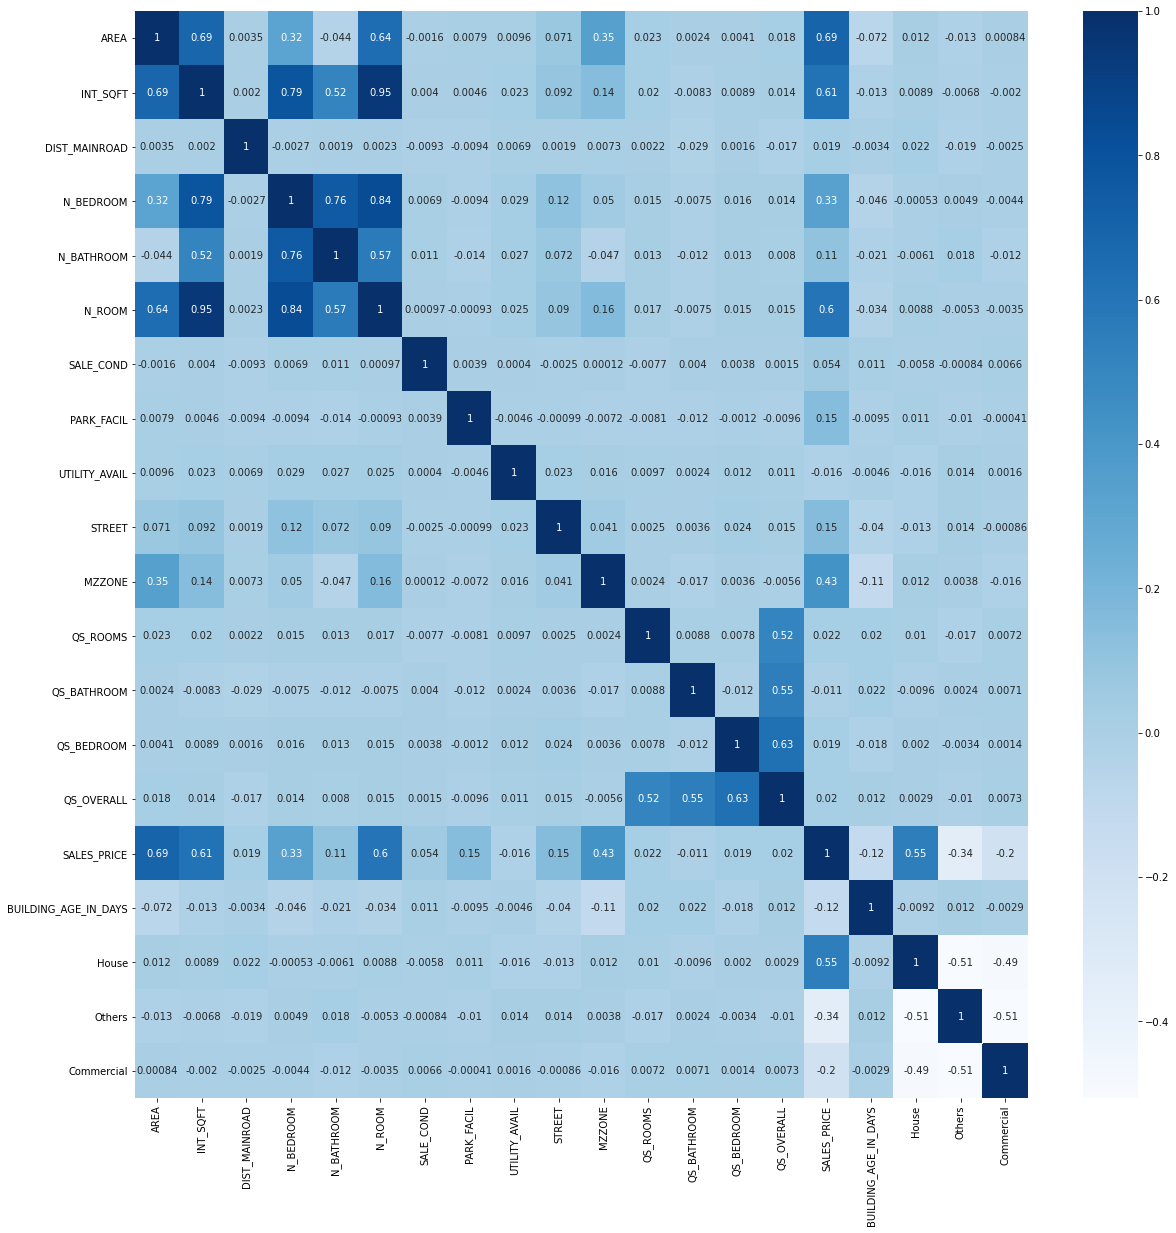

In [118]:
corrmat = df_train_final4.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat,cbar=True,annot=True,cmap='Blues')

In [119]:
############################## DEVELOPING THE MODEL ######################################

In [120]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso, HuberRegressor, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [121]:
"""## Split Dataset in train and test"""
 
X = df_train_final4.drop("SALES_PRICE", axis=1)
y = df_train_final4['SALES_PRICE']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7109, 19)
Shape of y =  (7109,)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5687, 19)
Shape of y_train =  (5687,)
Shape of X_test =  (1422, 19)
Shape of y_test =  (1422,)


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [124]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [125]:
#score for testing data 
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) 
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.9267889237360797, 1044962.4760997065)

In [126]:
#score for training data -------> test score is > train score ----> no overfitting
lr_scoreT = lr.score(X_train, y_train) 
lr_rmseT = rmse(y_train, lr.predict(X_train))
lr_scoreT, lr_rmseT

(0.9230447487287641, 1038070.8683192843)

In [127]:
#second way to find R2 value. we can observe the same R2 value with score() above, and r2_score() below. 
#even we can find 3rd way is using cross_val_score() it also gives same value. 
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,lr.predict(X_test)))

R2- SCORE: 0.9267889237360797


In [128]:
# Lasso 
#scores for testing data
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) 
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

C:\Users\ANACONDA-2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199940769458390.0, tolerance: 7963408138794.656
  model = cd_fast.enet_coordinate_descent(


(0.9267888309074525, 1044963.1385841715)

In [129]:
#score for training data -------> test score is > train score ----> no overfitting
lr_lasso_scoreT = lr_lasso.score(X_train, y_train) 
lr_lasso_rmseT = rmse(y_train, lr_lasso.predict(X_train))
lr_lasso_scoreT, lr_lasso_rmseT

(0.923044748696236, 1038070.8685386748)

In [130]:
#ridge
#ridge scores for testing data
lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test) 
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.9267816747578129, 1045014.2081815691)

In [131]:
#score for training data -------> test score is > train score ----> no overfitting
lr_ridge_scoreT = lr_ridge.score(X_train, y_train) 
lr_ridge_rmseT = rmse(y_train, lr_ridge.predict(X_train))
lr_ridge_scoreT, lr_ridge_rmseT

(0.9230444465003179, 1038072.9067392249)

In [132]:
"""## Support Vector Machine"""
#scores for testing data
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) 
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(-0.04918745796876922, 3955841.160624434)

In [133]:
#score for training data -------> test score is < train score ----> overfitting
svr_scoreT = svr.score(X_train, y_train) 
svr_rmseT = rmse(y_train, svr.predict(X_train))
svr_scoreT, svr_rmseT

(-0.02156526236697287, 3782169.0072739143)

In [134]:
#KNN regressor. very small value of R2 = 0.34 represent that KNN() doesn't  fit. 
from sklearn.neighbors import KNeighborsRegressor
neighbor = KNeighborsRegressor(n_neighbors=7)
neighbor.fit(X_train, y_train)
KNN_score=neighbor.score(X_test,y_test)
KNN_rmse = rmse(y_test, neighbor.predict(X_test))
KNN_score, KNN_rmse

(0.35176734593915493, 3109408.289295715)

In [135]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
DT_score=regressor.score(X_test,y_test) 
DT_rmse = rmse(y_test, regressor.predict(X_test))
DT_score, DT_rmse

(0.9681333417720465, 689414.7344418991)

In [136]:
#score for training data -------> test score is < train score ----> overfitting
regressor_scoreT = regressor.score(X_train, y_train) 
regressor_rmseT = rmse(y_train, regressor.predict(X_train))
regressor_scoreT, regressor_rmseT

(1.0, 0.0)

In [137]:
"""## Random Forest Regressor"""
 
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 23) #model
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) 
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse



(0.9862265634291321, 453245.4536035378)

In [138]:
#R2 value = (rfr.score() for X_test, y_test) which must be as equivalent as 
#R2 value = cross_val_score() for entire X and y dataset 
#here both score() function cross_val_score() are giving almost same values
from sklearn.model_selection import cross_val_score
rfr_score_val = cross_val_score(rfr, X, y, cv=10)
rfr_score_val

array([0.98618889, 0.98481937, 0.98668038, 0.98696393, 0.98518231,
       0.98491696, 0.98602917, 0.98542891, 0.98791029, 0.98752046])

In [139]:
#score for training data -------> test score is < train score ---->  overfitting
rfr_scoreT = rfr.score(X_train, y_train) 
rfr_rmseT = rmse(y_train, rfr.predict(X_train))
rfr_scoreT, rfr_rmseT

(0.9979006242098831, 171456.1097243762)

In [140]:
#finding r2 score as per the above syntax in shell 97 and also the syntax specified here are same...as same value of score.
rfr_score1=rfr.fit(X_train,y_train).score(X_test,y_test)
rfr_score1

0.9862265634291321

In [141]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfr, X, y, cv=10)

In [142]:
df_submission4 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_submission4

,Actual,Predicted
0,7600000,7554010.00
1,21717770,21595767.10
2,13159200,12652122.10
3,9630290,9591760.40
4,7406250,6861347.50
...,...,...
7104,5353000,5967752.50
7105,10818480,10380586.45
7106,8351410,8074857.10
7107,8507000,8419922.50


<AxesSubplot:>

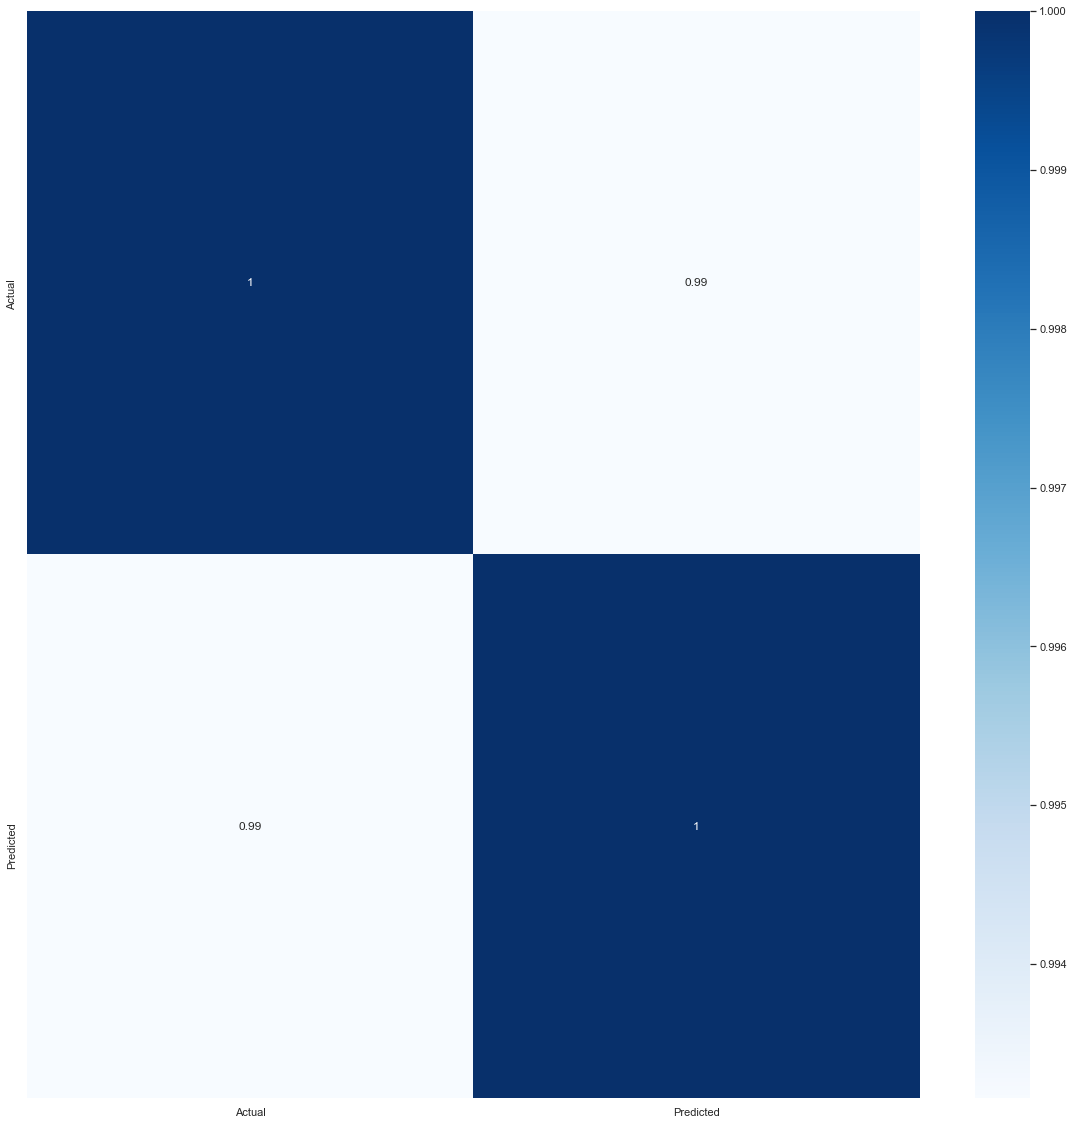

In [143]:
#correlation matrix
corrmat = df_submission4.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat,cbar=True,annot=True,cmap='Blues')

In [144]:
#correlation coefficient
df_submission4['Actual']. corr(df_submission4['Predicted'])

0.9931548816324769

Text(0, 0.5, 'Predicted')

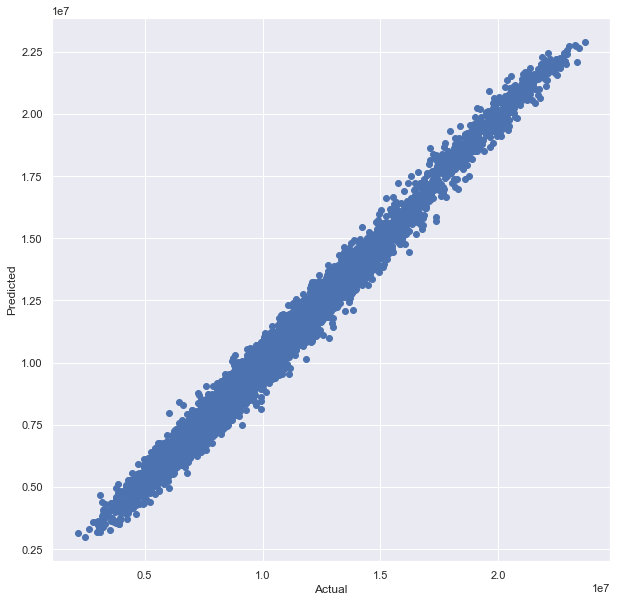

In [145]:
#linear relation between actual and predicted
plt.figure(figsize=(10,10))
plt.scatter(x='Actual',y='Predicted',data=df_submission4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [146]:
#just for the test data
predictions_test = cross_val_predict(rfr, X_test, y_test, cv=10)

In [147]:
df_submission5 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_test})
df_submission5

,Actual,Predicted
3144,9429000,10458831.25
429,9338880,9957082.40
4201,9464500,9027674.85
3567,11399205,10075838.80
5302,20551520,20390427.50
...,...,...
43,5728000,6469394.30
5392,12099995,11352334.15
5373,9914650,9774535.20
47,20215970,19638147.10


In [148]:
#correlation coefficient just for test data
df_submission5['Actual']. corr(df_submission5['Predicted'])

0.9845069742276891

Text(0, 0.5, 'Predicted')

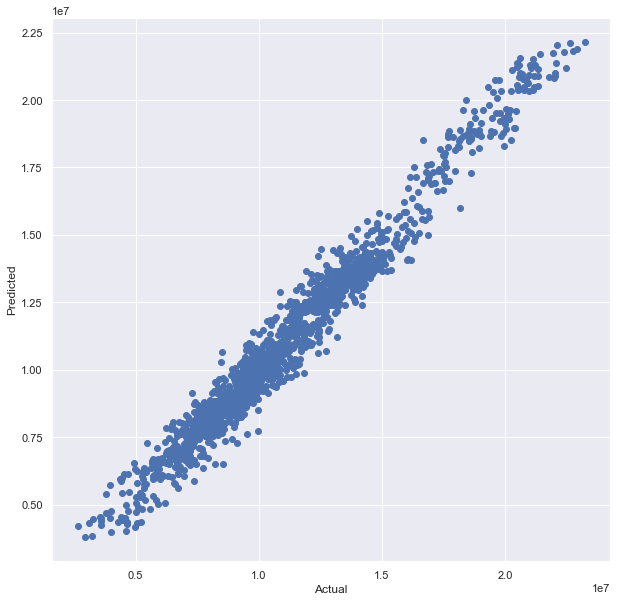

In [149]:
#linear relation between actual and predicted
plt.figure(figsize=(10,10))
plt.scatter(x='Actual',y='Predicted',data=df_submission5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [151]:
!pip install xgboost
from xgboost import XGBRegressor

In [152]:
#XGBoost regressor R2 score for test data
model = XGBRegressor()
model.fit(X_train, y_train)
XGB_score=model.score(X_test,y_test)
XGB_rmse = rmse(y_test, model.predict(X_test))
XGB_score, XGB_rmse

(0.996085219311358, 241638.43731142904)

In [153]:
#XGBoost R2 score for train data
XGB_scoreT = model.score(X_train, y_train) 
XGB_rmseT = rmse(y_train, model.predict(X_train))
XGB_scoreT, XGB_rmseT

(0.9994824480216166, 85130.43640544247)

In [154]:
predictions_XGB = cross_val_predict(model, X, y, cv=10)

In [155]:
df_submission6 = pd.DataFrame({'Actual': y, 'Predicted': predictions_XGB})
df_submission6

,Actual,Predicted
0,7600000,7153440.0
1,21717770,21367342.0
2,13159200,13086709.0
3,9630290,9591664.0
4,7406250,7230632.0
...,...,...
7104,5353000,5913609.0
7105,10818480,10889868.0
7106,8351410,8503783.0
7107,8507000,8721379.0


In [156]:
#correlation coefficient
df_submission6['Actual']. corr(df_submission6['Predicted'])

0.9980115287672845

Text(0, 0.5, 'Predicted')

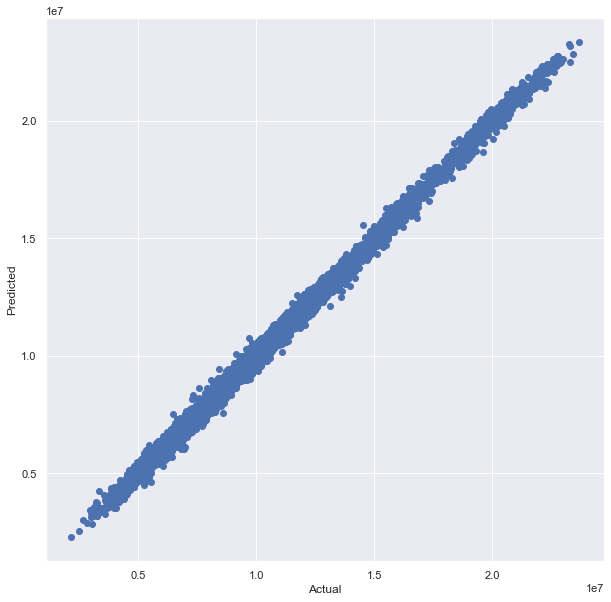

In [157]:
#linear relation between actual and predicted
plt.figure(figsize=(10,10))
plt.scatter(x='Actual',y='Predicted',data=df_submission6)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:>

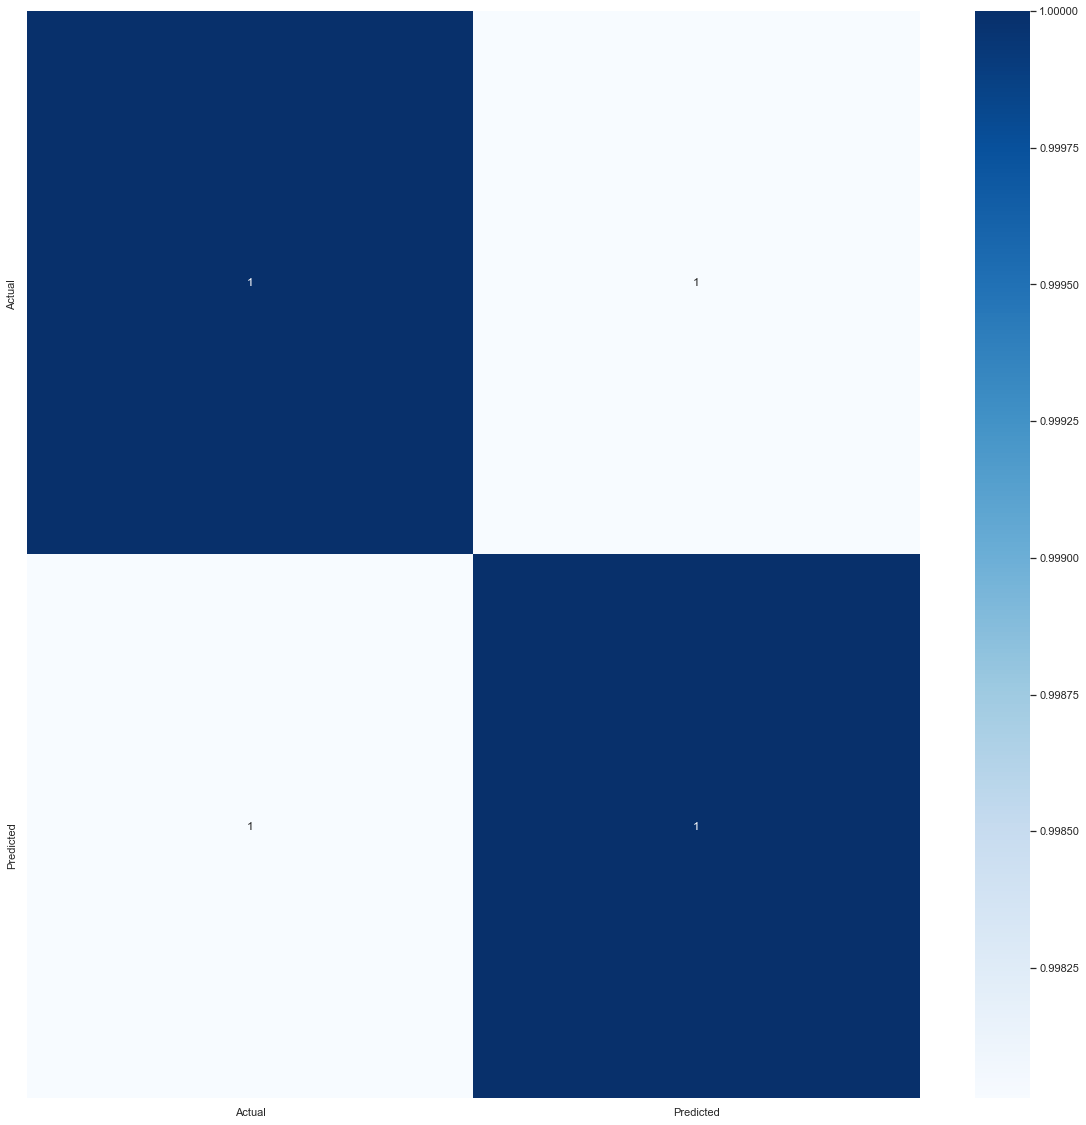

In [158]:
#correlation matrix
corrmat = df_submission6.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat,cbar=True,annot=True,cmap='Blues')